In [1]:
import os
import pandas as pd

# Merge all the files into one csv
folder_path = "D:/学习/DATA ANALYSIS/CaseStudy1/"
output_file="merged.csv"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
df_list = [pd.read_csv(os.path.join(folder_path,file),encoding='ISO-8859-1') for file in csv_files]
merge_df = pd.concat(df_list, ignore_index=True)
merge_df.to_csv(os.path.join(folder_path, output_file), index=False, encoding='utf-8')

In [3]:
import pandas as pd

#check the first 5 lines of the merged file

file_path = "D:/学习/DATA ANALYSIS/CaseStudy1/merged.csv"
df = pd.read_csv(file_path)
print(df.head())

            ride_id  rideable_type           started_at             ended_at  \
0  C1D650626C8C899A  electric_bike  2024-01-12 15:30:27  2024-01-12 15:37:59   
1  EECD38BDB25BFCB0  electric_bike  2024-01-08 15:45:46  2024-01-08 15:52:59   
2  F4A9CE78061F17F7  electric_bike  2024-01-27 12:27:19  2024-01-27 12:35:19   
3  0A0D9E15EE50B171   classic_bike  2024-01-29 16:26:17  2024-01-29 16:56:06   
4  33FFC9805E3EFF9A   classic_bike  2024-01-31 05:43:23  2024-01-31 06:09:35   

           start_station_name start_station_id           end_station_name  \
0           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
1           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
2           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
3      Wells St & Randolph St     TA1305000030  Larrabee St & Webster Ave   
4  Lincoln Ave & Waveland Ave            13253   Kingsbury St & Kinzie St   

  end_station_id  start_lat  start_lng    end_lat    end

In [5]:
import pandas as pd
file_path = "D:/学习/DATA ANALYSIS/CaseStudy1/merged.csv"
df = pd.read_csv(file_path)
print(df.tail(5))

                  ride_id  rideable_type               started_at  \
5860563  BD56BA20F42E4794  electric_bike  2024-12-11 08:23:46.564   
5860564  3074643A6B60B300  electric_bike  2024-12-09 12:26:15.677   
5860565  15602635C5DF484E  electric_bike  2024-12-31 17:10:03.113   
5860566  F15ABBA961560B75  electric_bike  2024-12-01 14:39:47.216   
5860567  8AF273287533B527  electric_bike  2024-12-17 06:38:32.320   

                        ended_at             start_station_name  \
5860563  2024-12-11 08:37:34.532     Clybourn Ave & Division St   
5860564  2024-12-09 12:37:32.712        Canal St & Jackson Blvd   
5860565  2024-12-31 17:17:21.838  Albany Ave & Bloomingdale Ave   
5860566  2024-12-01 14:45:21.268  Albany Ave & Bloomingdale Ave   
5860567  2024-12-17 06:46:27.167  Albany Ave & Bloomingdale Ave   

        start_station_id                end_station_name end_station_id  \
5860563     TA1307000115                             NaN            NaN   
5860564            13138        

In [11]:
import pandas as pd

#Calculate the ride_length

file_path = "D:/学习/DATA ANALYSIS/CaseStudy1/merged.csv"
df = pd.read_csv(file_path)
df['started_at'] = pd.to_datetime(df['started_at'], format='mixed', errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='mixed', errors='coerce')

df['ride_length'] = df['ended_at'] - df['started_at']

print(df[['started_at','ended_at','ride_length']].head())
df.to_csv("D:/学习/DATA ANALYSIS/CaseStudy1/ride_length.csv",index=False)

           started_at            ended_at     ride_length
0 2024-01-12 15:30:27 2024-01-12 15:37:59 0 days 00:07:32
1 2024-01-08 15:45:46 2024-01-08 15:52:59 0 days 00:07:13
2 2024-01-27 12:27:19 2024-01-27 12:35:19 0 days 00:08:00
3 2024-01-29 16:26:17 2024-01-29 16:56:06 0 days 00:29:49
4 2024-01-31 05:43:23 2024-01-31 06:09:35 0 days 00:26:12


In [13]:
import pandas as pd

# weekday: 0-Monday, 6-Sunday

file_path = "D:/学习/DATA ANALYSIS/CaseStudy1/ride_length.csv"
df = pd.read_csv(file_path)
df['started_at'] = pd.to_datetime(df['started_at'], format='mixed', errors='coerce')
df['weekday'] = df['started_at'].dt.weekday
print(df[['started_at','weekday']].head())
df.to_csv("D:/学习/DATA ANALYSIS/CaseStudy1/weekday.csv",index=False)

           started_at  weekday
0 2024-01-12 15:30:27        4
1 2024-01-08 15:45:46        0
2 2024-01-27 12:27:19        5
3 2024-01-29 16:26:17        0
4 2024-01-31 05:43:23        2


In [15]:
import pandas as pd

file_path = "D:/学习/DATA ANALYSIS/CaseStudy1/weekday.csv"
df = pd.read_csv(file_path)

df['ride_length'] = pd.to_timedelta(df['ride_length']).dt.total_seconds()
avg_ride_length =  df.groupby(['member_casual','weekday'])['ride_length'].mean().reset_index()
avg_ride_length['ride_length'] = pd.to_timedelta(avg_ride_length['ride_length'], unit='s')
print(avg_ride_length)

   member_casual  weekday               ride_length
0         casual        0 0 days 00:24:08.187637697
1         casual        1 0 days 00:21:30.826676872
2         casual        2 0 days 00:22:16.586953611
3         casual        3 0 days 00:21:54.457876144
4         casual        4 0 days 00:24:31.650947481
5         casual        5 0 days 00:28:11.516838694
6         casual        6 0 days 00:29:25.050867180
7         member        0 0 days 00:12:12.606776016
8         member        1 0 days 00:12:16.946506054
9         member        2 0 days 00:12:27.009306441
10        member        3 0 days 00:12:15.395280283
11        member        4 0 days 00:12:25.102930711
12        member        5 0 days 00:14:04.407757547
13        member        6 0 days 00:14:16.227787874


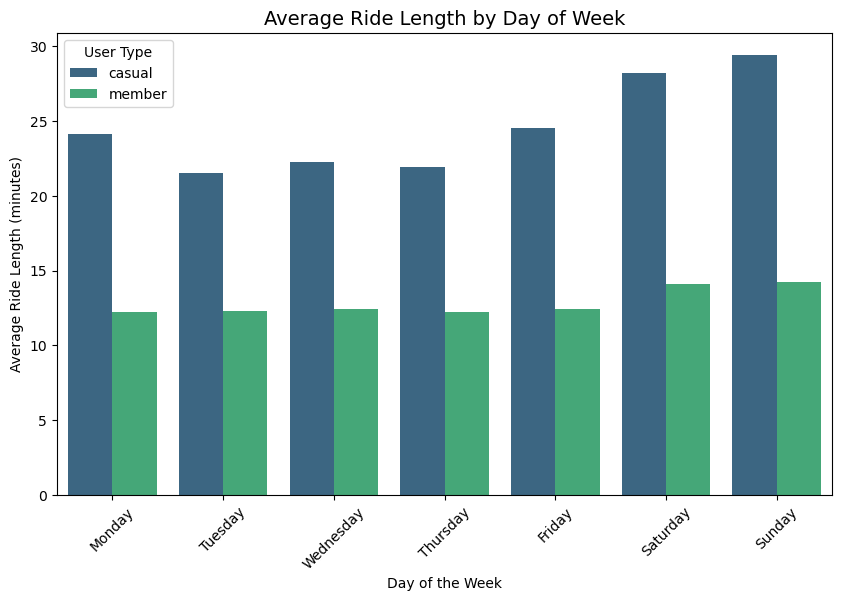

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "D:/学习/DATA ANALYSIS/CaseStudy1/weekday.csv"  # 替换为你的文件路径
df = pd.read_csv(file_path)

df['ride_length'] = pd.to_timedelta(df['ride_length']).dt.total_seconds()

avg_ride_length = df.groupby(['member_casual', 'weekday'])['ride_length'].mean().reset_index()

avg_ride_length['ride_length'] = avg_ride_length['ride_length'] / 60  # 秒 → 分钟

weekday_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 
                  4: "Friday", 5: "Saturday", 6: "Sunday"}
avg_ride_length['weekday'] = avg_ride_length['weekday'].map(weekday_mapping)


avg_ride_length['weekday'] = pd.Categorical(avg_ride_length['weekday'], 
                                            categories=["Monday", "Tuesday", "Wednesday", "Thursday", 
                                                        "Friday", "Saturday", "Sunday"], ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_ride_length, x='weekday', y='ride_length', hue='member_casual', palette='viridis')

plt.title("Average Ride Length by Day of Week", fontsize=14)
plt.xlabel("Day of the Week")
plt.ylabel("Average Ride Length (minutes)")
plt.legend(title="User Type")
plt.xticks(rotation=45)


plt.show()


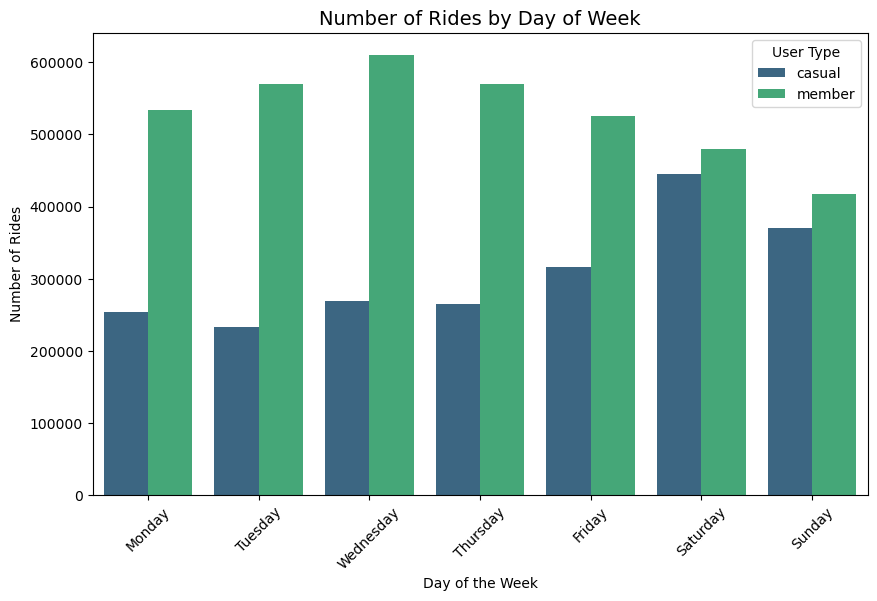

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "D:/学习/DATA ANALYSIS/CaseStudy1/weekday.csv"  
df = pd.read_csv(file_path)


ride_counts = df.groupby(['member_casual', 'weekday'])['ride_id'].count().reset_index()


ride_counts.rename(columns={'ride_id': 'ride_count'}, inplace=True)


weekday_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 
                   4: "Friday", 5: "Saturday", 6: "Sunday"}
ride_counts['weekday'] = ride_counts['weekday'].map(weekday_mapping)

ride_counts['weekday'] = pd.Categorical(ride_counts['weekday'], 
                                            categories=["Monday", "Tuesday", "Wednesday", "Thursday", 
                                                        "Friday", "Saturday", "Sunday"], ordered=True)


plt.figure(figsize=(10, 6))
sns.barplot(data=ride_counts, x='weekday', y='ride_count', hue='member_casual', palette='viridis')


plt.xlabel("Day of the Week")
plt.ylabel("Number of Rides")
plt.legend(title="User Type")
plt.xticks(rotation=45)


plt.show()
